In [1]:
import scalers
import os
import numpy as np
from matplotlib import pyplot as plt
from my_utils import *

clear_data_dir()

In [2]:
tdc = "0x0351"
chan = 2 # zero based
acq_time = 0.1

trig_chan = 30
trig_veto_rate = 1000

trig_veto_rate = 1000

scalers.padiwa_thresh(tdc,chan,0x8000)

thresh_list = []
rate_list   = []
state_list  = []

spillbreak_rate_list   = []

c=0
for i in np.arange(20000,50000,0xFF):
  scalers.padiwa_thresh(tdc,chan,i)

  while True:
    rates = scalers.scaler_rate(tdc,[chan,trig_chan],acq_time)
    rate = rates[0]
    trig_rate = rates[1]
    state = scalers.read_ch_state(tdc,[chan])[0]
    
    if (trig_rate/acq_time > trig_veto_rate):
    
      #thresh_list += [i]
      rate_list += [rate]
      #state_list += [state]
      print(".",end="")
      break
    else:
      print(":",end="")
      c+=1
      if (c%20 == 0 ):
        print("")
  c+=1
  if (c%20 == 0 ):
    print("")
    

....................
....................
....................
....................
....................
..................

In [3]:
c = 0

for i in np.arange(20000,50000,0xFF):
  scalers.padiwa_thresh(tdc,chan,i)

  while True:
    rates = scalers.scaler_rate(tdc,[chan,trig_chan],acq_time)
    rate = rates[0]
    trig_rate = rates[1]
    state = scalers.read_ch_state(tdc,[chan])[0]
    
    if (trig_rate/acq_time < trig_veto_rate):
    
      thresh_list += [i]
      spillbreak_rate_list += [rate]
      state_list += [state]
      print(".",end="")
      break
    else:
      print(":",end="")
      c+=1
      if (c%20 == 0 ):
        print("")
    
  c+=1
  if (c%20 == 0 ):
    print("")

:::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::....................
....................
....................
....:::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::................
....................
..................

saving to /workdir/jupyter/padiwa_thresh_scan_data/001.svg
saving to /workdir/jupyter/padiwa_thresh_scan_data/001.pickle


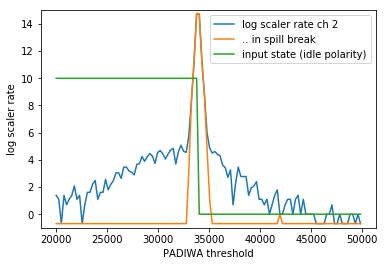

saving to /workdir/jupyter/padiwa_thresh_scan_data/rate_list.pickle
saving to /workdir/jupyter/padiwa_thresh_scan_data/state_list.pickle
saving to /workdir/jupyter/padiwa_thresh_scan_data/thresh_list.pickle
saving to /workdir/jupyter/padiwa_thresh_scan_data/spillbreak_rate_list.pickle


In [5]:
from matplotlib import pyplot as plt

thresh_list = np.array(thresh_list)
rate_list = np.array(rate_list)
rate_list = rate_list + (rate_list == 0)*0.5
state_list = np.array(state_list)

spillbreak_rate_list = np.array(spillbreak_rate_list)
spillbreak_rate_list = spillbreak_rate_list + (spillbreak_rate_list == 0)*0.5

plt.plot(thresh_list,np.log(rate_list),label="log scaler rate ch {:d}".format(chan))
plt.plot(thresh_list,np.log(spillbreak_rate_list),label=".. in spill break")
plt.plot(thresh_list,state_list*10,label="input state (idle polarity)")
plt.xlabel("PADIWA threshold")
plt.ylabel("log scaler rate")
plt.ylim(-1,15)
plt.legend()
show(plt)

pickle_this(rate_list,"rate_list")
pickle_this(state_list,"state_list")
pickle_this(thresh_list,"thresh_list")
pickle_this(spillbreak_rate_list,"spillbreak_rate_list")

In [7]:
# set optimal threshold

scalers.padiwa_thresh(tdc,chan,32000)

In [8]:
archive(label="Si-Strip")